# Random Forest

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('penguins.csv')
df = df.dropna()
df = df[df['sex'] != '.']
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


## Train Test Split

In [9]:
X = pd.get_dummies(df.drop('species', axis = 1),drop_first=True)
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


In [10]:
y = df['species']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

## Random Forest Model

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
model = RandomForestClassifier(n_estimators=9,
                        max_features='sqrt', random_state=9) 

In [18]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=9, random_state=9)

In [19]:
pengu_pred = model.predict(X_test)

## Değerlendirme Metrikleri

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score,classification_report

In [25]:
confusion_matrix ( y_test, pengu_pred)

array([[44,  1,  1],
       [ 1, 22,  0],
       [ 1,  0, 30]])

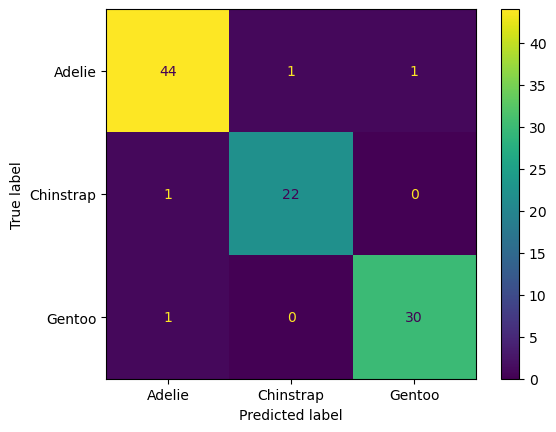

In [26]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [29]:
print(classification_report(y_test, pengu_pred))

              precision    recall  f1-score   support

      Adelie       0.96      0.96      0.96        46
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       0.97      0.97      0.97        31

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



In [31]:
model.feature_importances_

array([0.40410856, 0.03960461, 0.14964551, 0.20052233, 0.16789954,
       0.0315447 , 0.00667476])

In [36]:
hata = []

for n in range(1,99):
    model = RandomForestClassifier(n_estimators=n, 
                                   max_features='sqrt', 
                                   random_state=9)
    model.fit(X_train,y_train)
    deneme_pred = model.predict(X_test)
    hata.append(1 - accuracy_score(deneme_pred, y_test))

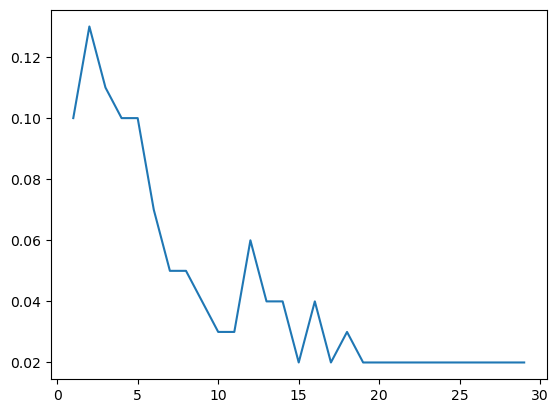

In [39]:
plt.plot(range(1,30), hata[:29], label = 'Hata Oranı')